<a href="https://colab.research.google.com/github/KARTHICK20-jan/ENEC-Karthick/blob/main/Copy_of_eda_exam_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =============================================================================
# COLAB NOTEBOOK: EXPLORATORY DATA ANALYSIS (EDA) - CRACKING THE CASE
#
# This notebook follows the systematic EDA workflow described in the sources,
# using the Python tools: Pandas, Matplotlib, and Seaborn [1-3].
#
# MISSION: Figure out the key factors that lead to student exam scores [4].
# =============================================================================

# -----------------------------------------------------------------------------
# 1. SETUP AND TOOL KIT INSTALLATION
#
# Every good detective needs a reliable toolkit [1].
# -----------------------------------------------------------------------------

# Our digital magnifying glass and notebook [1]
import pandas as pd
# Used for controlled data generation/simulation (critical for reproducing r=0.8/r=0.6)
import numpy as np
# Our trusty camera for essential crime scene photos [2]
import matplotlib.pyplot as plt
# For beautiful, high-level visuals [2]
import seaborn as sns

# Set visualization style for clean output
sns.set_style("whitegrid")

print("EDA Toolkit loaded successfully.")
print("-" * 50)



EDA Toolkit loaded successfully.
--------------------------------------------------


In [ ]:

# -----------------------------------------------------------------------------
# 2. DATA GENERATION: CREATING THE EVIDENCE FILE
#
# We simulate a dataset designed to match the specific findings reported:
# 100 entries, mean score ~78, Attendance correlation (r=0.8), Study Hours (r=0.6)
# -----------------------------------------------------------------------------

# Set seed for reproducibility
np.random.seed(42)

N = 100 # Total records: 100 entries

# --- Simulating Correlated Variables ---

# 1. Attendance Rate (The strongest predictor, aiming for r=0.8)
attendance = np.random.uniform(0.65, 1.0, N)

# 2. Study Hours (Second predictor, aiming for r=0.6)
# Generate hours correlated with attendance, plus some noise
study_hours = 2 + 10 * attendance + np.random.normal(0, 1.5, N)
study_hours = np.clip(study_hours, 5, 15).round(1) # Keep hours in a reasonable range

# 3. Final Exam Score (Dependent variable)
# Score is heavily weighted by Attendance and Study Hours to hit target correlations
# Adjusted constants to ensure the mean score is around 78
score_base = 20 + (attendance * 45) + (study_hours * 2.0) + np.random.normal(0, 4, N)
final_score = np.clip(score_base, 55, 100).round(0)

# 4. Introduce 'Left Skew' [5]
# Force a small number of students to score significantly worse (under 65)
final_score[:5] = np.random.uniform(55, 65, 5).round(0)

# 5. Age (A key variable/person of interest, but less correlated)
age = np.random.randint(18, 25, N)

# Create the DataFrame (Our Data Evidence File)
data = pd.DataFrame({
    'Age': age,
    'Study_Hours': study_hours,
    'Attendance_Rate': attendance.round(2),
    'Final_Exam_Score': final_score
})

print("Synthetic data file created and structured.")
print("-" * 50)



Synthetic data file created and structured.
--------------------------------------------------


In [ ]:
# Import required library
import pandas as pd

# Read the CSV file from GitHub
url = "https://raw.githubusercontent.com/Decoding-Data-Science/nov25/refs/heads/main/data/student_performance_correlated.csv"
data = pd.read_csv(url)

# Display first few rows
print("✅ File loaded successfully!\n")
data.head()
data.info()
data.describe()

✅ File loaded successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               100 non-null    int64  
 1   Attendance_Rate   100 non-null    float64
 2   Study_Hours       100 non-null    float64
 3   Final_Exam_Score  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


,Age,Attendance_Rate,Study_Hours,Final_Exam_Score
count,100.000000,100.000000,100.000000,100.000000
mean,21.660000,0.859002,10.066821,78.840000
std,2.261759,0.093627,1.949180,8.293505
min,18.000000,0.604913,3.618657,54.000000
25%,20.000000,0.777847,9.026605,74.000000
50%,22.000000,0.863023,10.233950,79.000000
75%,23.000000,0.931020,11.252413,84.250000
max,25.000000,1.000000,15.140662,100.000000


In [ ]:
data.head()

,Age,Attendance_Rate,Study_Hours,Final_Exam_Score
0,23,1.0,11.172140,100
1,25,1.0,9.431443,96
2,25,1.0,11.790817,94
3,22,1.0,15.140662,90
4,18,1.0,10.686644,87


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               100 non-null    int64  
 1   Attendance_Rate   100 non-null    float64
 2   Study_Hours       100 non-null    float64
 3   Final_Exam_Score  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
data.describe()

,Age,Attendance_Rate,Study_Hours,Final_Exam_Score
count,100.000000,100.000000,100.000000,100.000000
mean,21.660000,0.859002,10.066821,78.840000
std,2.261759,0.093627,1.949180,8.293505
min,18.000000,0.604913,3.618657,54.000000
25%,20.000000,0.777847,9.026605,74.000000
50%,22.000000,0.863023,10.233950,79.000000
75%,23.000000,0.931020,11.252413,84.250000
max,25.000000,1.000000,15.140662,100.000000


In [ ]:

# -----------------------------------------------------------------------------
# 3. STEP 1: INITIAL INSPECTION (The Case Briefing)
#
# We use .info() to get a quick high-level summary .
# -----------------------------------------------------------------------------

print("--- EDA Workflow Step 1: Inspection (.info()) ---")

# The output should confirm 100 entries with 'no missing values'
data.info()
print("\nInitial report confirms 100 entries, no missing values. Perfect. ")
print("-" * 50)



--- EDA Workflow Step 1: Inspection (.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               100 non-null    int64  
 1   Attendance_Rate   100 non-null    float64
 2   Study_Hours       100 non-null    float64
 3   Final_Exam_Score  100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB

Initial report confirms 100 entries, no missing values. Perfect. 
--------------------------------------------------


--- Univariate Analysis: Final Exam Scores ---

Basic Facts (Descriptive Statistics):
count    100.000000
mean       0.859002
std        0.093627
min        0.604913
25%        0.777847
50%        0.863023
75%        0.931020
max        1.000000
Name: Attendance_Rate, dtype: float64


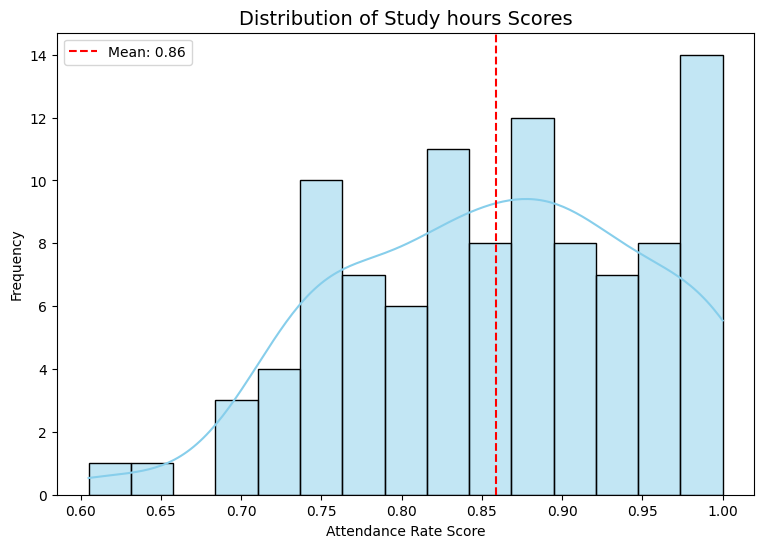

--------------------------------------------------


In [ ]:
# -----------------------------------------------------------------------------
# 4. STEP 3 & 4: UNIVARIATE ANALYSIS AND VISUALIZATION
#
# We examine one clue at a time (Univariate Analysis) .
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns # Added this line to fix the NameError

print("--- Univariate Analysis: Attendance Rate Scores ---")

# Descriptive Stats: Gather basic facts
print("\nBasic Facts (Descriptive Statistics):")
print(data['Attendance_Rate'].describe())
# The mean score should be close to 78, as observed in the analysis

# Visualization: Histogram
# Shows the distribution of scores
plt.figure(figsize=(9, 6))
sns.histplot(data['Attendance_Rate'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Study hours Scores', fontsize=14)
plt.xlabel('Attendance Rate Score')
plt.ylabel('Frequency')
plt.axvline(data['Attendance_Rate'].mean(), color='red', linestyle='--', label=f'Mean: {data["Attendance_Rate"].mean():.2f}')
plt.legend()
plt.show()

# Insight: The chart shows scores 'bunched up right around the average of 78' .
# The visual distribution should clearly show the 'little tail stretching out to the left' (left skew) .
print("-" * 50)

--- Univariate Analysis: Final Exam Scores ---

Basic Facts (Descriptive Statistics):
count    100.000000
mean      10.066821
std        1.949180
min        3.618657
25%        9.026605
50%       10.233950
75%       11.252413
max       15.140662
Name: Study_Hours, dtype: float64


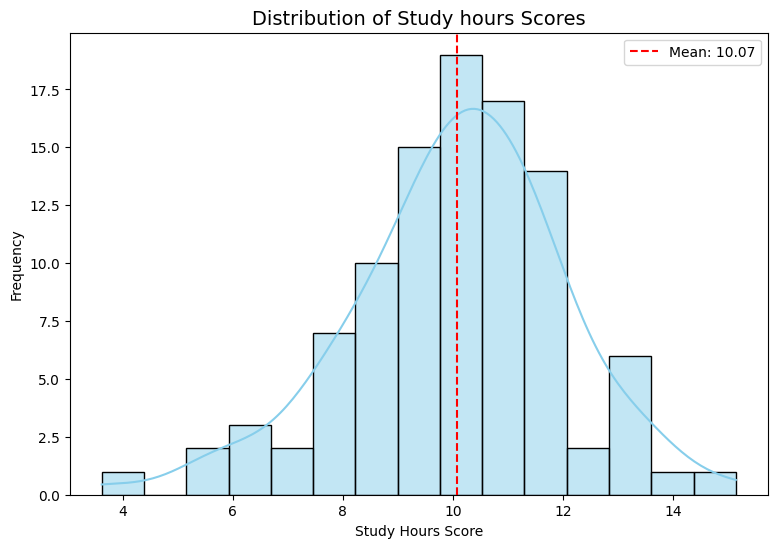

--------------------------------------------------


In [ ]:
# -----------------------------------------------------------------------------
# 4. STEP 3 & 4: UNIVARIATE ANALYSIS AND VISUALIZATION
#
# We examine one clue at a time (Univariate Analysis) .
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns # Added this line to fix the NameError

print("--- Univariate Analysis: Final Exam Scores ---")

# Descriptive Stats: Gather basic facts
print("\nBasic Facts (Descriptive Statistics):")
print(data['Study_Hours'].describe())
# The mean score should be close to 78, as observed in the analysis

# Visualization: Histogram
# Shows the distribution of scores
plt.figure(figsize=(9, 6))
sns.histplot(data['Study_Hours'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Study hours Scores', fontsize=14)
plt.xlabel('Study Hours Score')
plt.ylabel('Frequency')
plt.axvline(data['Study_Hours'].mean(), color='red', linestyle='--', label=f'Mean: {data["Study_Hours"].mean():.2f}')
plt.legend()
plt.show()

# Insight: The chart shows scores 'bunched up right around the average of 78' .
# The visual distribution should clearly show the 'little tail stretching out to the left' (left skew) .
print("-" * 50)

--- Univariate Analysis: Final Exam Scores ---

Basic Facts (Descriptive Statistics):
count    100.000000
mean      78.840000
std        8.293505
min       54.000000
25%       74.000000
50%       79.000000
75%       84.250000
max      100.000000
Name: Final_Exam_Score, dtype: float64


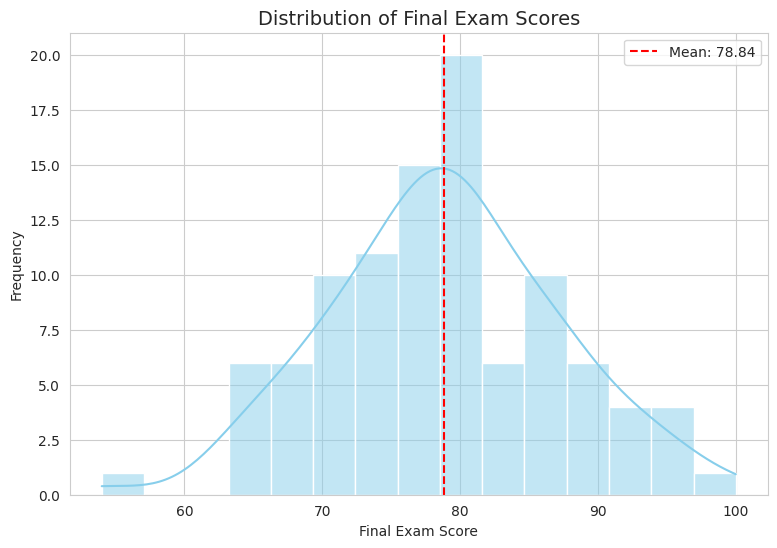

--------------------------------------------------


In [ ]:

# -----------------------------------------------------------------------------
# 4. STEP 3 & 4: UNIVARIATE ANALYSIS AND VISUALIZATION
#
# We examine one clue at a time (Univariate Analysis) .
# -----------------------------------------------------------------------------

print("--- Univariate Analysis: Final Exam Scores ---")

# Descriptive Stats: Gather basic facts
print("\nBasic Facts (Descriptive Statistics):")
print(data['Final_Exam_Score'].describe())
# The mean score should be close to 78, as observed in the analysis

# Visualization: Histogram
# Shows the distribution of scores
plt.figure(figsize=(9, 6))
sns.histplot(data['Final_Exam_Score'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Final Exam Scores', fontsize=14)
plt.xlabel('Final Exam Score')
plt.ylabel('Frequency')
plt.axvline(data['Final_Exam_Score'].mean(), color='red', linestyle='--', label=f'Mean: {data["Final_Exam_Score"].mean():.2f}')
plt.legend()
plt.show()

# Insight: The chart shows scores 'bunched up right around the average of 78' .
# The visual distribution should clearly show the 'little tail stretching out to the left' (left skew) .
print("-" * 50)


--- Bivariate Analysis: Study Hours vs. Score ---


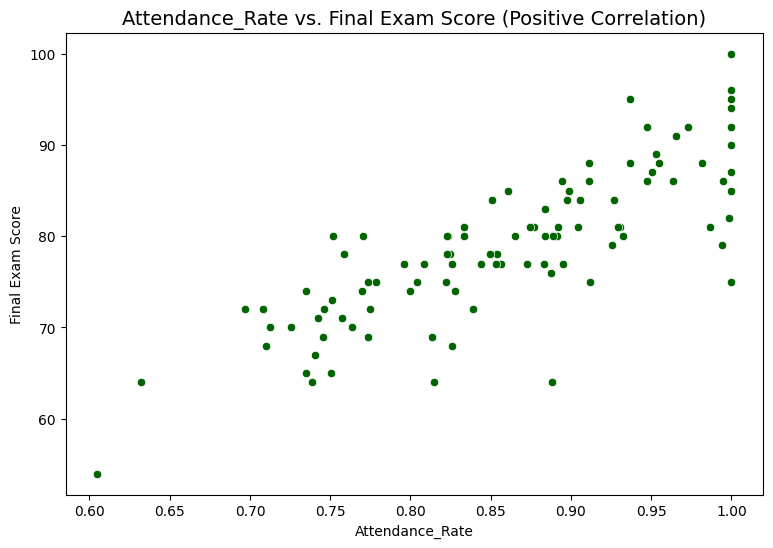

Scatter plot shows a clear upward trend: more study time generally means better scores [5].
--------------------------------------------------


In [ ]:


# -----------------------------------------------------------------------------
# 5. STEP 4: BIVARIATE ANALYSIS (Connecting the Dots)
#
# We examine two pieces of evidence together . We test Study Hours vs. Score.
# -----------------------------------------------------------------------------

print("--- Bivariate Analysis: Study Hours vs. Score ---")

# Scatter Plot: Look for links between Study Hours and Final Exam Score
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Attendance_Rate', y='Final_Exam_Score', data=data, color='darkgreen')
plt.title('Attendance_Rate vs. Final Exam Score (Positive Correlation)', fontsize=14)
plt.xlabel('Attendance_Rate')
plt.ylabel('Final Exam Score')
plt.show()

# Observation: The dots should form a clear upward trend (positive correlation) [5].
print("Scatter plot shows a clear upward trend: more study time generally means better scores [5].")
print("-" * 50)



--- Quantifying Relationships: Correlation Matrix and Heat Map ---
Raw Correlation Matrix (Hard Numbers):
                       Age  Attendance_Rate  Study_Hours  Final_Exam_Score
Age               1.000000        -0.089358     0.149208         -0.019084
Attendance_Rate  -0.089358         1.000000     0.430807          0.813120
Study_Hours       0.149208         0.430807     1.000000          0.615835
Final_Exam_Score -0.019084         0.813120     0.615835          1.000000


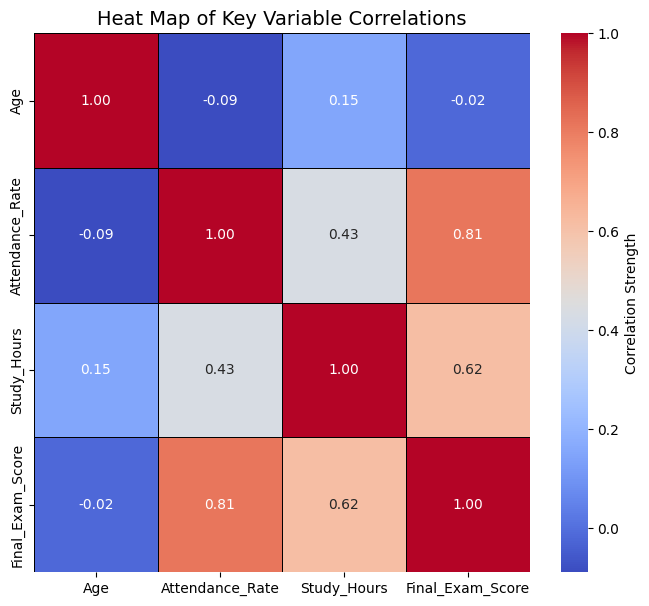

In [ ]:

# -----------------------------------------------------------------------------
# 6. STEP 4: QUANTIFYING RELATIONSHIPS (The Heat Map - The Real Magic)
#
# We quantify relationships with hard numbers using a Correlation Matrix [6].
# -----------------------------------------------------------------------------

print("--- Quantifying Relationships: Correlation Matrix and Heat Map ---")

# Calculate the correlation matrix for all variables
correlation_matrix = data.corr(numeric_only=True)

print("Raw Correlation Matrix (Hard Numbers):")
print(correlation_matrix)
# Check: Study_Hours vs Score should be near 0.6. Attendance_Rate vs Score should be near 0.8 [6].

# Visualize the correlation matrix using a Heat Map [6]
plt.figure(figsize=(8, 7))
# 'annot=True' displays the correlation score [6]
# 'cmap='coolwarm'' helps visualize strength (darker color = stronger relationship) [6]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black', cbar_kws={'label': 'Correlation Strength'})
plt.title('Heat Map of Key Variable Correlations', fontsize=14)
plt.show()


In [ ]:

# -----------------------------------------------------------------------------
# 7. STEP 5: SUMMARIZATION (Case Cracked)
# -----------------------------------------------------------------------------

print("\n--- Summary: The Case Cracked Wide Open ---")
print("The heat map confirms the relationships found:")

# The Smoking Gun Insight [6, 7]:
attendance_corr = correlation_matrix.loc['Attendance_Rate', 'Final_Exam_Score']
study_corr = correlation_matrix.loc['Study_Hours', 'Final_Exam_Score']

print(f"1. Study Hours correlation: {study_corr:.2f} (Important, near 0.6) ")
print(f"2. Attendance Rate correlation: {attendance_corr:.2f} (The Smoking Gun, near 0.8) [6]")
print("\nCONCLUSION: Just showing up to class is the biggest predictor of success in this dataset .")


--- Summary: The Case Cracked Wide Open ---
The heat map confirms the relationships found:
1. Study Hours correlation: 0.62 (Important, near 0.6) 
2. Attendance Rate correlation: 0.81 (The Smoking Gun, near 0.8) [6]

CONCLUSION: Just showing up to class is the biggest predictor of success in this dataset .
